In [1]:
# Import required libraries
import math
import pip
pip.main(['install','seaborn'])

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (0.11.2)

Requirement already satisfied: numpy>=1.15 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from seaborn) (1.22.1)

Requirement already satisfied: scipy>=1.0 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from seaborn) (1.9.0)

Requirement already satisfied: matplotlib>=2.2 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from seaborn) (3.5.2)

Requirement already satisfied: pandas>=0.23 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from seaborn) (1.3.5)

Requirement already satisfied: fonttools>=4.22.0 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn) (4.34.4)

Requirement already satisfied: packaging>=20.0 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn) (21.3)

Requirement already satisfied: python-dateutil>=2.7 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn) (2.8.2)

Requirement already satisfied: kiwisolver>=1.0.1 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn) (1.4.4)

Requirement already satisfied: pyparsing>=2.2.1 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn) (3.0.9)

Requirement already satisfied: pillow>=6.2.0 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn) (9.2.0)

Requirement already satisfied: cycler>=0.10 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from matplotlib>=2.2->seaborn) (0.11.0)

Requirement already satisfied: pytz>=2017.3 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from pandas>=0.23->seaborn) (2022.1)

Requirement already satisfied: six>=1.5 in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (from python-dateutil>=2.7->matplotlib>=2.2->seaborn) (1.16.0)

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip3.8 install --upgrade pip

## Bussiness Understanding

From 2019 StackOverflow Data, i was very excited to know the answers of following questions:
1. How can organizations size affect developers’ job satisfaction?
2. Does a developer’s age affect what programming languages they know or want to learn?
3. Do people in different countries learn about software development differently?

## Data Understanding

I have used a dataset from Stack Overflow Annual Developer Survey — 2019 for Data Analysis. You can easily access or download this dataset from (https://insights.stackoverflow.com/survey)

In [2]:
# Read Dataset
dframe = pd.read_csv('survey_results_public.csv')

In [3]:
# Let's take a quick look to data (just few rows)
dframe.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
# Check how many rows & columns our datasets contains
dframe.shape

(88883, 85)

In [5]:
# Check column names in our dataset, what all data we have
dframe.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [6]:
# Information for all our column dataset
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [7]:
# Describe our dataset count how many rows, mean, standard deviation etc.
dframe.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [8]:
# Check Respondent Expericences for Software Development
dframe.MainBranch.value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

In [9]:
#Check how much career satisfaction Respondents has. 
dframe.CareerSat.value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [10]:
# Check Employment Status of Respondents
dframe.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

In [11]:
# Check Organization Size of Respondents 
dframe.OrgSize.value_counts()

20 to 99 employees                                    15199
100 to 499 employees                                  12834
10,000 or more employees                              10147
1,000 to 4,999 employees                               7520
2-9 employees                                          7393
10 to 19 employees                                     6768
500 to 999 employees                                   4575
Just me - I am a freelancer, sole proprietor, etc.     4370
5,000 to 9,999 employees                               2985
Name: OrgSize, dtype: int64

In [12]:
# What Gender Respondents has for our dataset
dframe.Gender.value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

In [13]:
# Check how much Job Satisfaction Respondents has
dframe.JobSat.value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [14]:
# Check whether whether respondents dependent financially
dframe.Dependents.value_counts()

No     50727
Yes    32332
Name: Dependents, dtype: int64

array([[<AxesSubplot:title={'center':'Respondent'}>,
        <AxesSubplot:title={'center':'CompTotal'}>],
       [<AxesSubplot:title={'center':'ConvertedComp'}>,
        <AxesSubplot:title={'center':'WorkWeekHrs'}>],
       [<AxesSubplot:title={'center':'CodeRevHrs'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

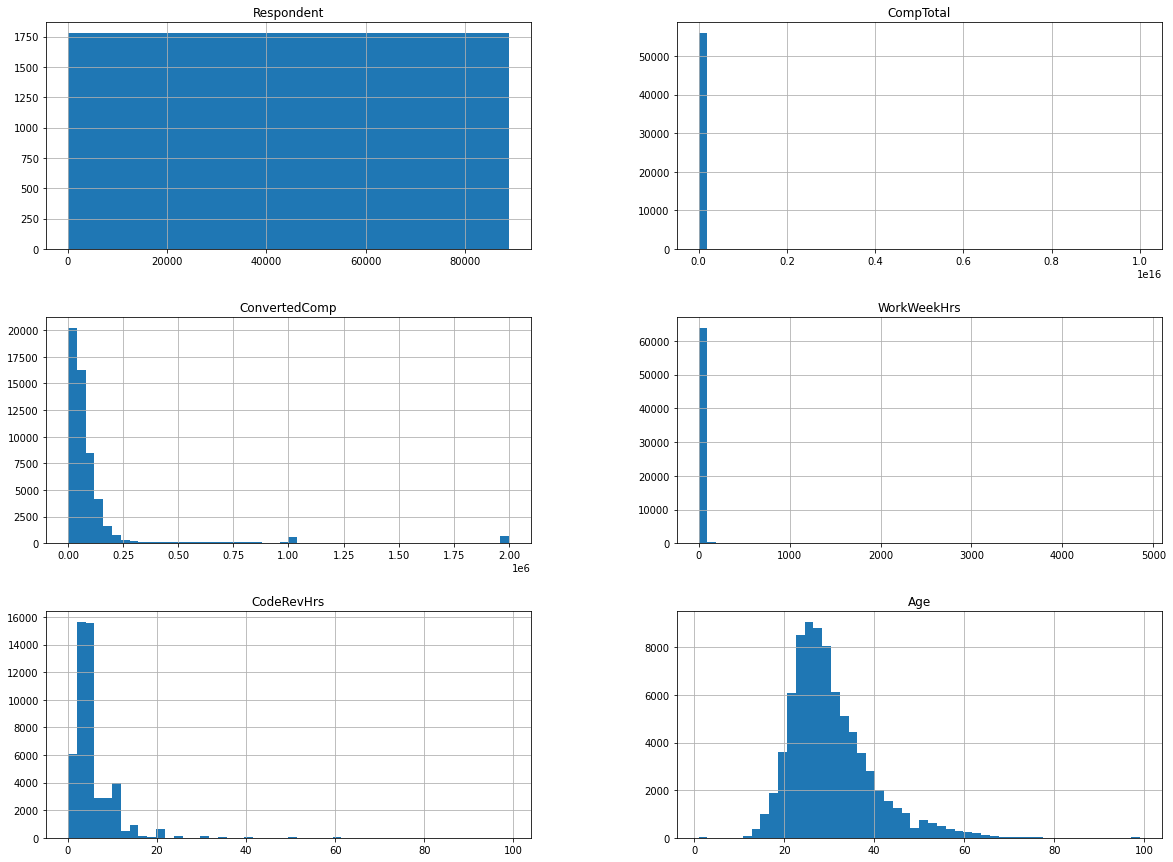

In [15]:
# Draw a Figure & check data for Respondent, CompTotal, ConvertedComp, WorkWeekHrs, CodeRevHrs & Age Fields.
dframe.hist(bins=50, figsize=(20,15))

## Data Preparation

This saves most of the work. Only nine columns are required for detailed analysis, so you can create a new data frame from these columns.

In [16]:
# Let's Create a Dataframe which we are going to use for analysis or which is relevant.

dframe = dframe[['Country',  'OrgSize',  'JobFactors', 'WorkChallenge', 'JobSat','LanguageDesireNextYear',
         'LanguageWorkedWith', 'Age', 'Employment', 'EduOther']]

dframe.head()

,Country,OrgSize,JobFactors,WorkChallenge,JobSat,LanguageDesireNextYear,LanguageWorkedWith,Age,Employment,EduOther
0,United Kingdom,NaN,NaN,NaN,NaN,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python,14.0,"Not employed, and not looking for work","Taught yourself a new language, framework, or ..."
1,Bosnia and Herzegovina,NaN,Financial performance or funding status of the...,NaN,NaN,C++;HTML/CSS;JavaScript;SQL,C++;HTML/CSS;Python,19.0,"Not employed, but looking for work",Taken an online course in programming or softw...
2,Thailand,100 to 499 employees,"Languages, frameworks, and other technologies ...",Distracting work environment;Inadequate access...,Slightly satisfied,Elixir;HTML/CSS,HTML/CSS,28.0,Employed full-time,"Taught yourself a new language, framework, or ..."
3,United States,100 to 499 employees,"Languages, frameworks, and other technologies ...",NaN,Slightly satisfied,C;C#;JavaScript;SQL,C;C++;C#;Python;SQL,22.0,Employed full-time,Taken an online course in programming or softw...
4,Ukraine,"10,000 or more employees","Industry that I'd be working in;Languages, fra...",Being tasked with non-development work;Inadequ...,Slightly dissatisfied,HTML/CSS;Java;JavaScript;SQL;WebAssembly,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,30.0,Employed full-time,Taken an online course in programming or softw...


In [17]:
# Info for our selected column/datapoints closely
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 88751 non-null  object 
 1   OrgSize                 71791 non-null  object 
 2   JobFactors              79371 non-null  object 
 3   WorkChallenge           68141 non-null  object 
 4   JobSat                  70988 non-null  object 
 5   LanguageDesireNextYear  84088 non-null  object 
 6   LanguageWorkedWith      87569 non-null  object 
 7   Age                     79210 non-null  float64
 8   Employment              87181 non-null  object 
 9   EduOther                84260 non-null  object 
dtypes: float64(1), object(9)
memory usage: 6.8+ MB


In [18]:
# Check Respondents Age & Count

dframe.Age = dframe.Age.round()

dframe.Age.value_counts()

25.0    4670
24.0    4435
27.0    4418
26.0    4400
28.0    4390
        ... 
4.0        1
90.0       1
83.0       1
97.0       1
87.0       1
Name: Age, Length: 91, dtype: int64

## Modeling & Evaluation for Data

Let's take a closer look at some of the columns (LanguageWorkedWith, JobFactors, LanguageDesireNextYear, EduOther & WorkChallenge). I need to control the facts a bit. For each of these questions, most  respondents checked multiple answer boxes. Since there are dozens of possible combinations of answer values, we need to split the string of possible values ​​and then increment by one.

10


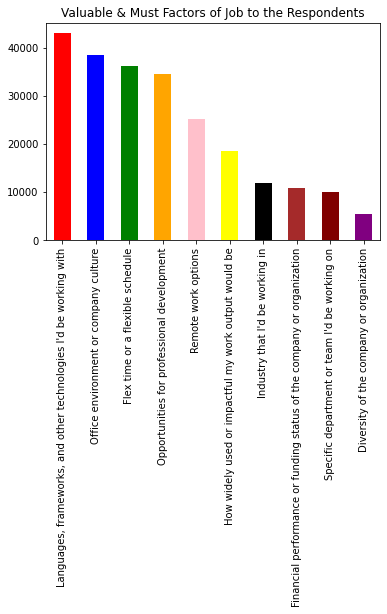

In [19]:
#  Now Let's check what all JobFactors are most important for Respondents

jobFactors = dframe.JobFactors.str.split(';', expand=True).stack().value_counts()
l = []
pallete=['red','blue','green','orange','pink','yellow', 'black','brown','maroon','purple']
print(len(jobFactors))
for i in range(0, len(jobFactors)+1):
    l.append(tuple(np.random.choice(range(0, 2), size=3)))
jobFactors.plot(kind='bar', label='C1',color=pallete)
plt.title('Valuable & Must Factors of Job to the Respondents');

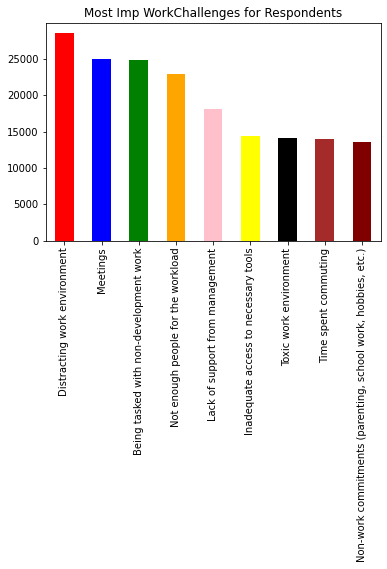

In [20]:
# Identify the most important job challenges for respondents

workChallenges = dframe.WorkChallenge.str.split(';', expand=True).stack().value_counts()
workChallenges.plot(kind='bar',color=pallete)
plt.title('Most Imp WorkChallenges for Respondents');

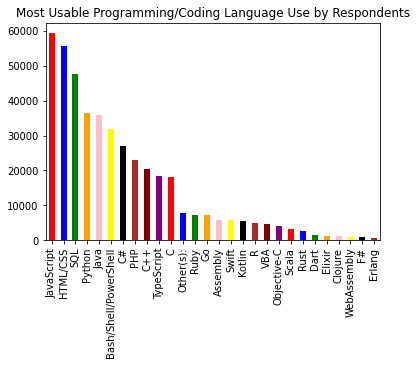

In [21]:
# Examine the Coding languages ​​most frequently used  by respondents

codingLang = dframe.LanguageWorkedWith.str.split(';', expand=True).stack().value_counts()
codingLang.plot(kind='bar',color=pallete)
plt.title('Most Usable Programming/Coding Language Use by Respondents');

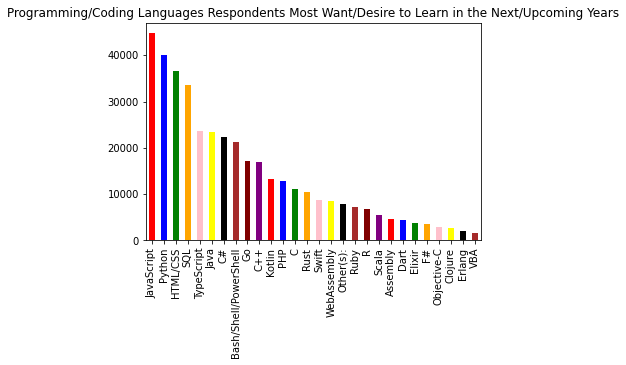

In [22]:
# Which Coding Languages most in Demand or Respondent want to learn next year.

codingLang = dframe.LanguageDesireNextYear.str.split(';', expand=True).stack().value_counts()
codingLang.plot(color=pallete, kind='bar')
plt.title('Programming/Coding Languages Respondents Most Want/Desire to Learn in the Next/Upcoming Years');

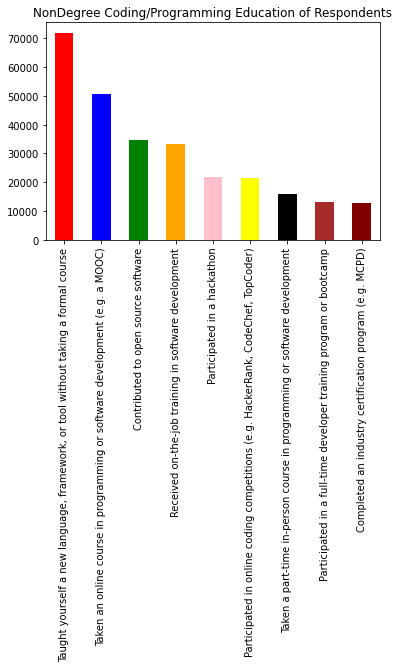

In [23]:
# Find out what type of casual programming schooling the respondents have
otherEducation = dframe.EduOther.str.split(';', expand=True).stack().value_counts()
otherEducation.plot(color=pallete, kind='bar')
plt.title('NonDegree Coding/Programming Education of Respondents');

## Question 1.
How can organization size affect developers' job satisfaction?

Numerous respondents assert that "Office atmosphere or corporate culture" is a significant job aspect and that "Distraction at work environment," "Not enough personnel for the workload," and "Meetings" are the biggest workplace issues. It's not difficult to think that a company's size would affect how content creators are at work.
I will utilise a clustered bar chart, with the clusters on the x-axis showing organisation size and the individual bars in each cluster reflecting the level of job happiness, to determine whether there is a relationship between job satisfaction and company size.

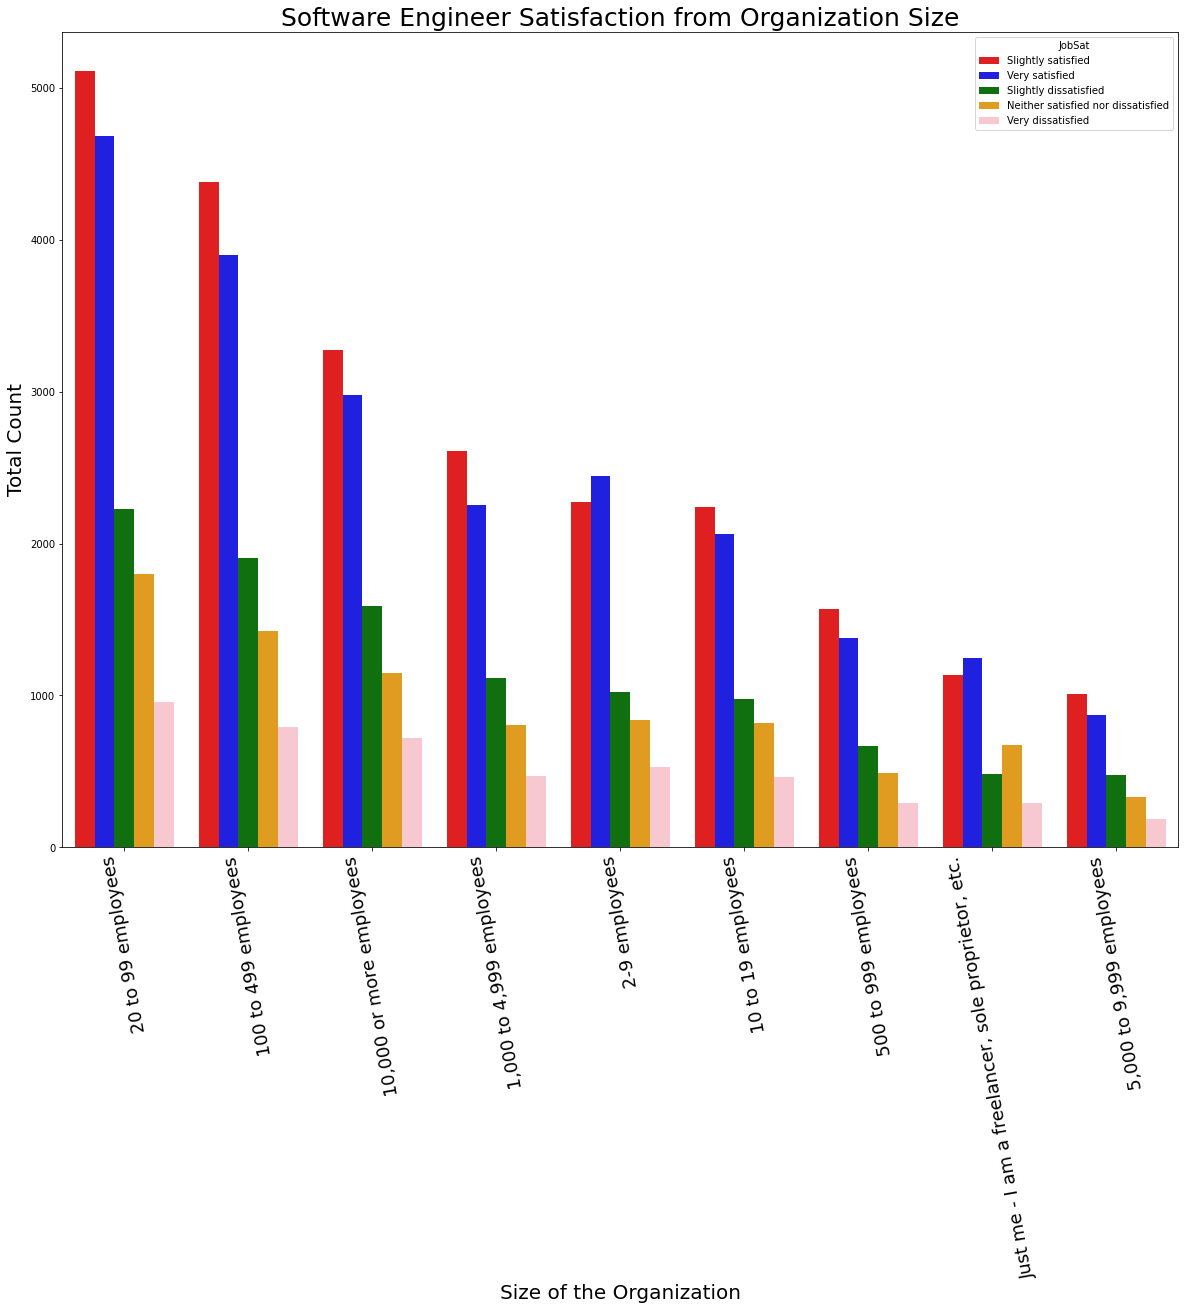

In [24]:
'''First we need to clean data, We need to clean missing attributes so that our algorithm can make good predictions
or we have accurate results or we can answer our question properly. For cleaning missing attributes we have basically
three ways, As of now we are using first one by dropping all the rows with null values'''
# Let's create new Dataframe that will drop all of the rows with null values in the OrganizationSize and JobSatus columns
dframe2 = dframe.dropna(subset=['JobSat','OrgSize'], axis=0)

figure, axis = plt.subplots(figsize=(20, 15))
sns.countplot(ax=axis, x='OrgSize', hue='JobSat', data=dframe2,
              order=dframe.OrgSize.value_counts().index.tolist(),
              hue_order=dframe.JobSat.value_counts().index.tolist(),
              palette=pallete)
axis.set_xticklabels(axis.get_xticklabels(), fontsize=18, rotation=100)
axis.set_title('Software Engineer Satisfaction from Organization Size', fontsize=25)
axis.set_xlabel('Size of the Organization', fontsize=20)
axis.set_ylabel('Total Count', fontsize=20);

From the nine different sized organizations included in the survey data, freelancers/sole proprietors and employees in companies with two to nine employees appeared to report the highest percentage of job satisfaction. looks like It's not just "slightly satisfied". Among sole proprietors, more people feel neutral about their jobs than dissatisfied, distinguishing this category from all other business size categories.

However, in his two largest categories of respondents in firms with 20-99 employees and firms with 100-499 employees, respondents rated "very satisfied" or "relatively satisfied" rather than neutral or dissatisfied. More people responded.

# Question 2: 
Does a developer's age affect what programming languages ​​they know or want to learn? 

 Software tool preferences can change over time as technology advances and new people begin to learn software development. Such changes could potentially be tracked by modeling the popularity of different programming languages ​​among respondents of different ages. 
 
 For this analysis, I plan to use a line chart that plots the respondent's age on the x-axis, with the line representing the score for each programming language. To avoid making the graph  too wide, we focus on  respondents between the ages of 18 and her 45.

In [25]:
def CategoricalPlot(dframe, numeric_col, category_col, 
                         to_drop, title, x_label, y_label):
    
    # Sequential Numerical Order Data Columns
    numeric_order = dframe[numeric_col].unique()
    
    category_count = {}
    for number in numeric_order:
        counter_per_number = dframe[dframe[numeric_col].isin([number])]
        counter_per_number = counter_per_number[category_col].str.cat(sep=';')
        counter_per_number = pd.Series(counter_per_number.split(';'))
        counter_per_number = counter_per_number.value_counts()
        category_count[number] = counter_per_number

    # Create a new data frame using a dictionary with numeric values as columns and categories as rows.
    category_dataframe = pd.DataFrame()
    for k, v in category_count.items():
        category_dataframe[k] = v

    # Use the 'Transpose' method to swap the number of categories and numbers  and reorder the values to match
    category_dataframe = category_dataframe.transpose()
    category_dataframe = category_dataframe.sort_index()

    # Drop/Remove the unrelevant cols of data
    category_dataframe.drop(to_drop, axis=1, inplace=True)
    # Continuing respondents aged 18-45
    category_dataframe = category_dataframe.iloc[15:43]

    # Now it's time to plot a graph
    ax = category_dataframe.plot(kind='line', figsize=(20,15), colormap='gist_rainbow')
    ax.set_title(title, fontsize=25)
    ax.set_xlabel(x_label, fontsize=20)
    ax.set_ylabel(y_label, fontsize=20);

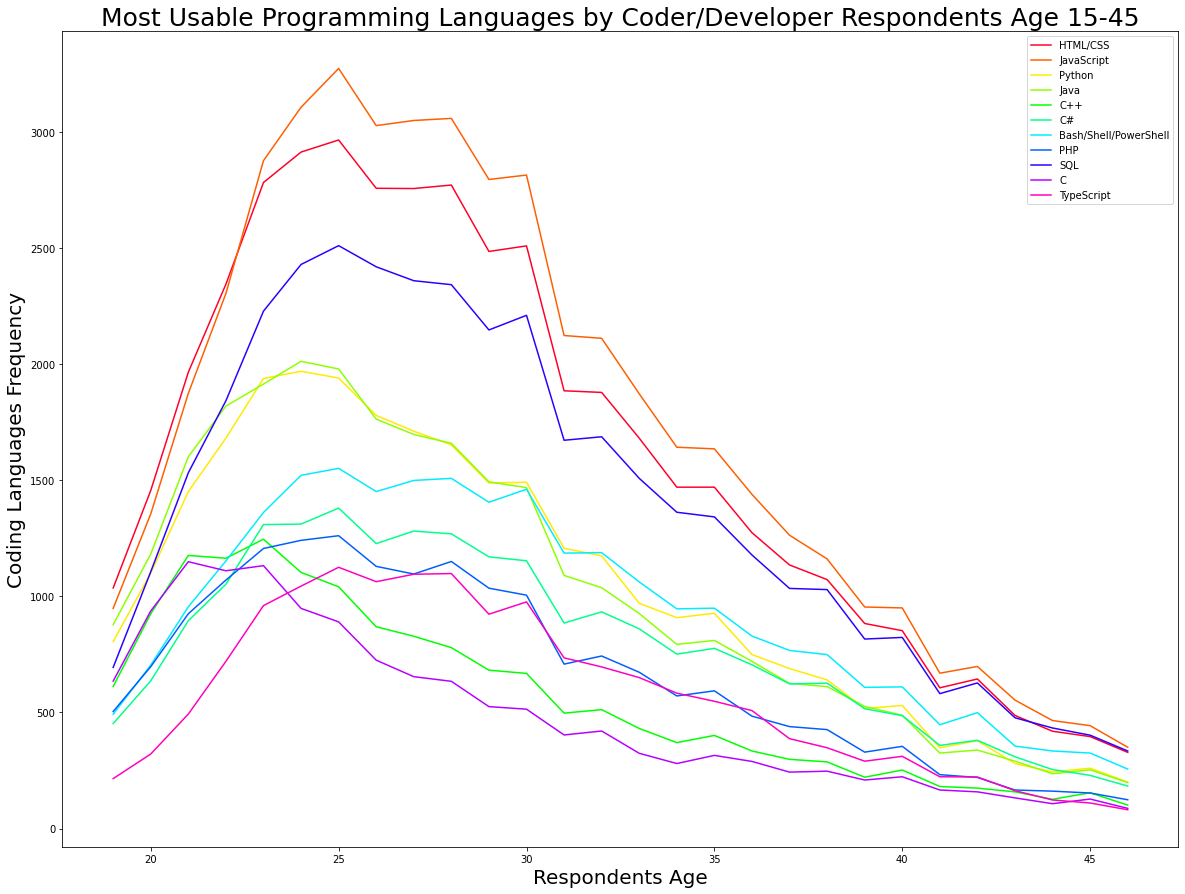

In [26]:
# Use the new methods for some of the columns "Age" and "Language".

to_drop = ['Elixir',  'Assembly',
           'VBA','R', 'Objective-C', 'Ruby','Scala',  'Dart','F#', 'Swift',  'Clojure', 'Go', 'Kotlin',  
           'WebAssembly','Rust','Other(s):',]
CategoricalPlot(dframe, 'Age', 'LanguageWorkedWith', to_drop,
                     'Most Usable Programming Languages by Coder/Developer Respondents Age 15-45',
                     'Respondents Age',
                     'Coding Languages Frequency')

The graph shows that Bash/Shell/PowerShell are the 4th most popular programming languages ​​among older respondents, but their popularity has dropped significantly among younger respondents, falling to just under 30 years old. has been overtaken by Java and Python. Both Java and Python are  used more frequently by younger respondents, and respondents under the age of 20  use these languages ​​more than SQL. Respondents under the age of 22 also said they use JavaScript more often than HTML. This is a big change from the older generation of programmers. There is also a significant increase in the use of C and C++ among those under 25.


This graph shows that Python is becoming the preferred programming language for younger respondents. This ranges from loosely related to SQL and HTML to languages ​​almost as popular as JavaScript among 25-year-olds. Among respondents under the age of 22, Python outperforms JavaScript. Also, his increasing use of C and C++ among the younger respondent suggests that the respondent's growing interest in Java as well as the fascination with C and C++ is  reflected in the gradual increase of Meanwhile, TypeScript has moved from his fifth most popular programming language for respondents aged 24-36 to  the least desirable programming language for respondents aged 18.

## Question 3.
Do people in different countries learn about software development differently? 

Difference in culture can have a significant impact on self-study. People who live and work in different countries are more likely to use different channels to learn software development skills. 
 For this analysis, he chose 10 countries from which most of the respondents came. We then use the correlation matrix to create a heat he map of these countries and scores for the different types of non-degree software development training the residents have taken.

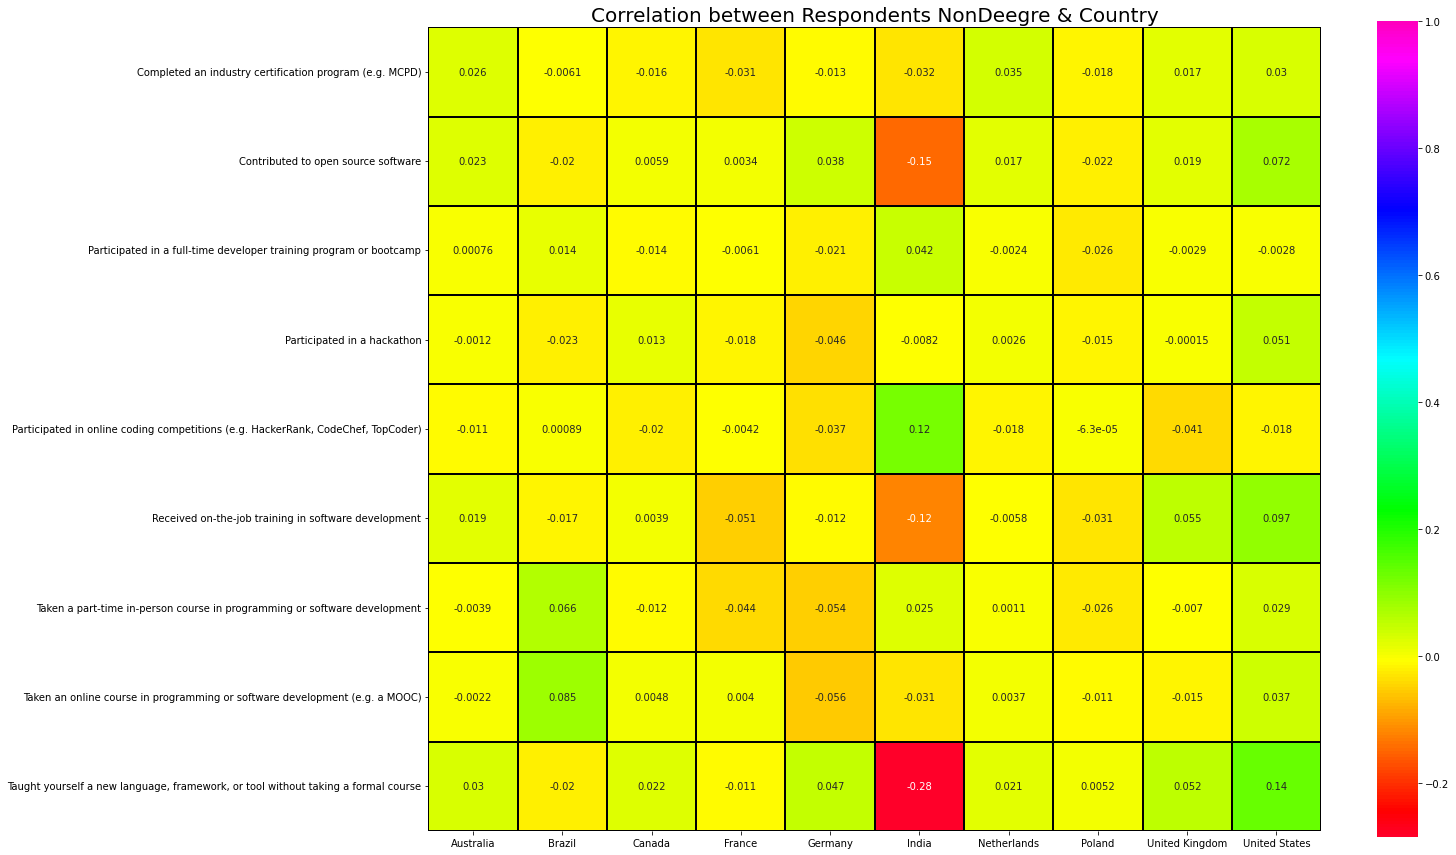

In [27]:
# Let's create an fresh dataframe with only the countries and EduOther included columns.
# Use only  top 10 countries of respondents
dframe3_cols = ['Country', 'EduOther'] 
dframe3 = pd.DataFrame(dframe.query("Country == 'India' or Country == 'Poland' or Country == 'Germany'  or Country == 'Australia' or Country == 'Netherlands' or Country == 'United Kingdom' or  Country == 'France' or Country == 'Canada' or Country == 'United States'  or Country == 'Brazil'"))[dframe3_cols]


# Will Split Country and EduOther values ​​into columns with dummy variables
dframe3 = pd.concat([dframe3.drop('EduOther', axis=1), dframe3['EduOther'].str.get_dummies(sep=';')], axis=1)
dframe3 = pd.concat([dframe3.drop('Country', axis=1), dframe3['Country'].str.get_dummies()], axis=1)

# Make a correlation matrix, and then use the correlation matrix as a new dataframe
dframe3 = dframe3.corr()

# Drop the Country rows from one axis, and the EducationalOthers columns from the other
dframe3.drop(['France','Australia', 'Netherlands', 'Brazil', 'Germany', 'India', 'Canada',
         'United States', 'Poland', 'United Kingdom'], axis=0, inplace=True)
dframe3.drop(dframe.EduOther.str.split(';', expand=True).stack().value_counts().index.tolist(), 
         axis=1, inplace=True)

#dframe3 Rename the EducationalOther rows to conserve space on the graph
index = {}
for each in dframe.EduOther.str.split(';', expand=True).stack().value_counts().index.tolist():
    index[each] = each
dframe3.rename(index=index, inplace=True)

# Plot the Output on a Heatmap Graph
plt.figure(figsize=(20, 15))
colormap = plt.cm.gist_rainbow
plt.title("Correlation between Respondents NonDeegre & Country", y=1.00, size=20)
sns.heatmap(dframe3, linewidths=0.1, vmax=1, square=True, cmap=colormap, linecolor='black', annot=True);
